# **1. 데이터 전처리**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# 데이터 불러오기 / 인덱스열 지정
df = pd.read_csv('/content/drive/MyDrive/2. Data Science/1. CodeStates/2. Project/Section1_Project/vgames2.csv', index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 데이터 info 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 결측치 행 제거 / 인덱스 재설정
# 판단근거: 결측치 행의 데이터 수는 전체의 2.2%로 큰 영향을 미치지 않는 수로 판단
df = df.dropna(how='any').reset_index(drop=True)

In [ ]:
# Year 타입 int로 변환
df.Year = df.Year.astype(int)

# Year 컬럼이 1980 ~ 2016년으로 한정하기
# 이유: 2가지 숫자로 이루어진 Year 값, 데이터가 적고 연속성이 없는 2017, 2020년도 제외
df = df[(df['Year'] >= 1980) & (df['Year'] <= 2016)]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# Sales 컬럼 값 중 M 단위변환
df.NA_Sales = df.NA_Sales.str.replace('M', '')
df.EU_Sales = df.EU_Sales.str.replace('M', '')
df.JP_Sales = df.JP_Sales.str.replace('M', '')
df.Other_Sales = df.Other_Sales.str.replace('M', '')

In [ ]:
# K(천) 단위를 M(백만)으로 바꿔주는 함수 만들기
def ktom(x):
  if 'K' in x:
    x = x.replace('K', '')
    x = float(x)
    x = x * (1 / 1000)
    return x
  else:
    return x

In [ ]:
# Sales 컬럼 K(천)을 M(백만)으로 변환
df.NA_Sales = df.NA_Sales.apply(ktom)
df.EU_Sales = df.EU_Sales.apply(ktom)
df.JP_Sales = df.JP_Sales.apply(ktom)
df.Other_Sales = df.Other_Sales.apply(ktom)

In [ ]:
# Sales 컬럼 실수형으로 변환
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(pd.to_numeric)
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
# Total Sales 컬럼 추가
df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


# **2. EDA**


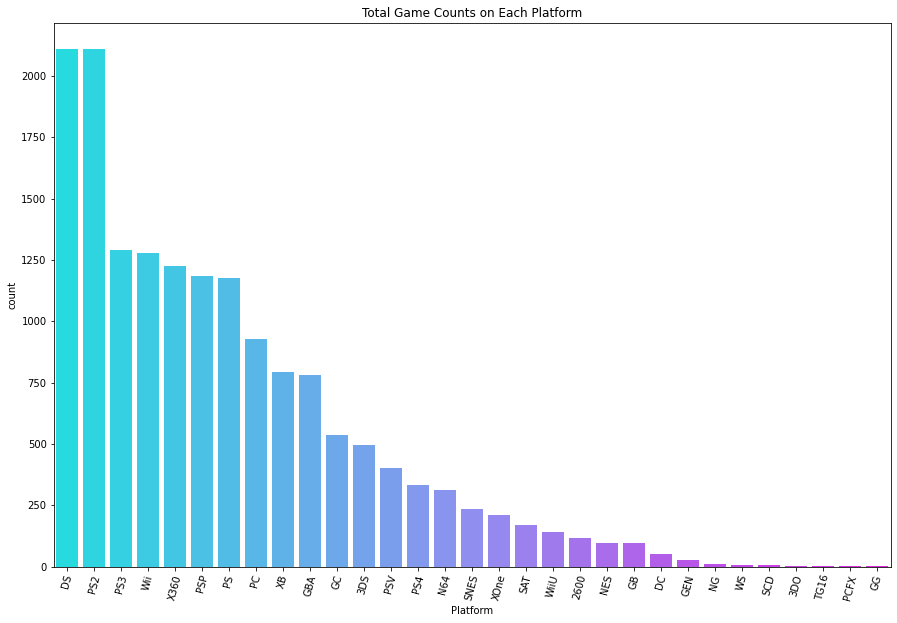

In [ ]:
# 플랫폼별 게임 발매량
plt.figure(figsize=(15,10))
plt.xticks(rotation = 75)
sns.countplot(x= df['Platform'], data = df, order=df['Platform'].value_counts()
.index, palette='cool')
plt.title('Total Game Counts on Each Platform')
plt.show()

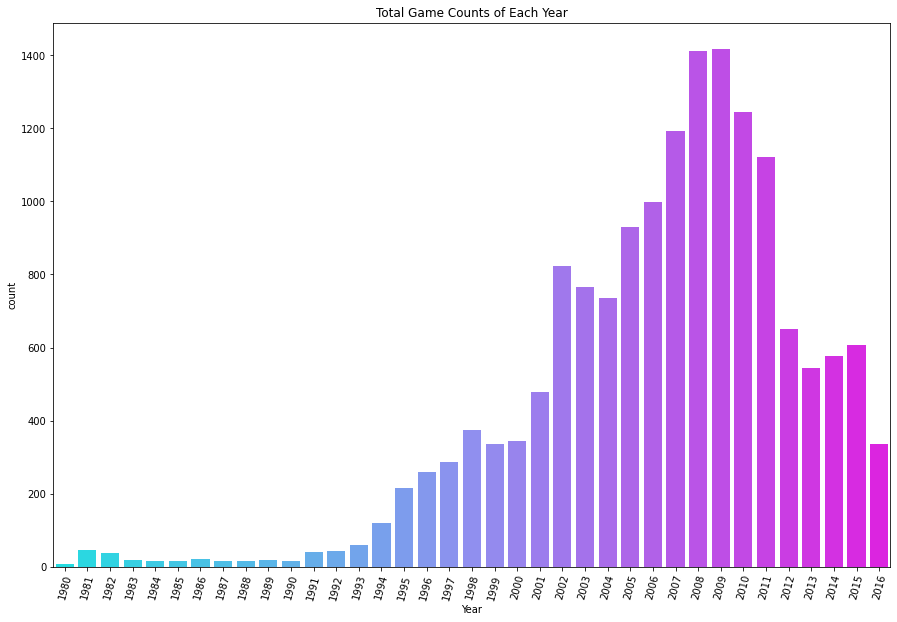

In [ ]:
# 연도별 게임 발매량
plt.figure(figsize=(15,10))
plt.xticks(rotation = 75)
sns.countplot(x= df['Year'], data = df, palette='cool')
plt.title('Total Game Counts of Each Year')
plt.show()

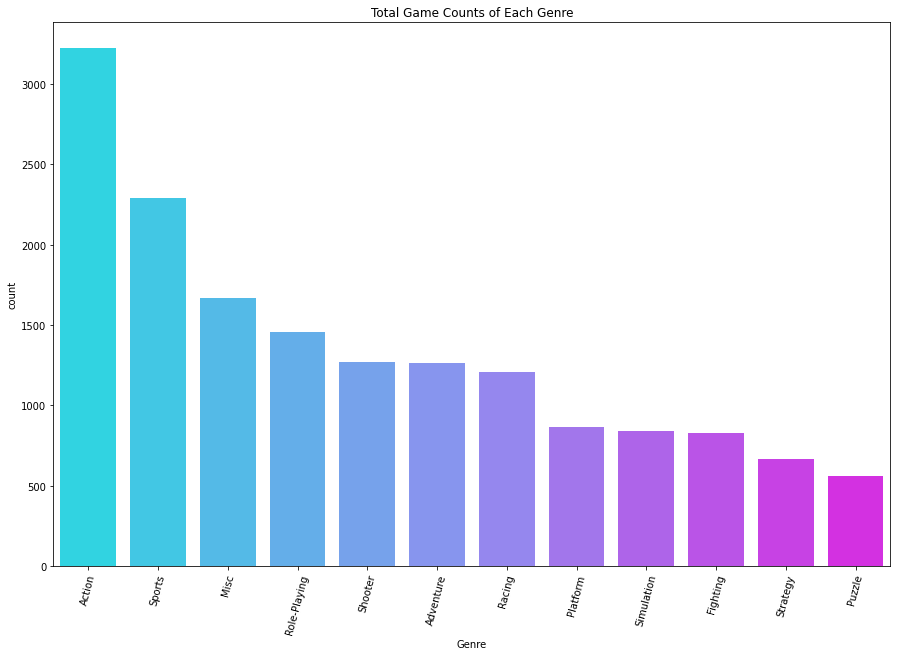

In [ ]:
# 장르별 게임 발매량
plt.figure(figsize=(15,10))
plt.xticks(rotation = 75)
sns.countplot(x= df['Genre'], data = df, order=df['Genre'].value_counts().index, palette='cool')
plt.title('Total Game Counts of Each Genre')
plt.show()

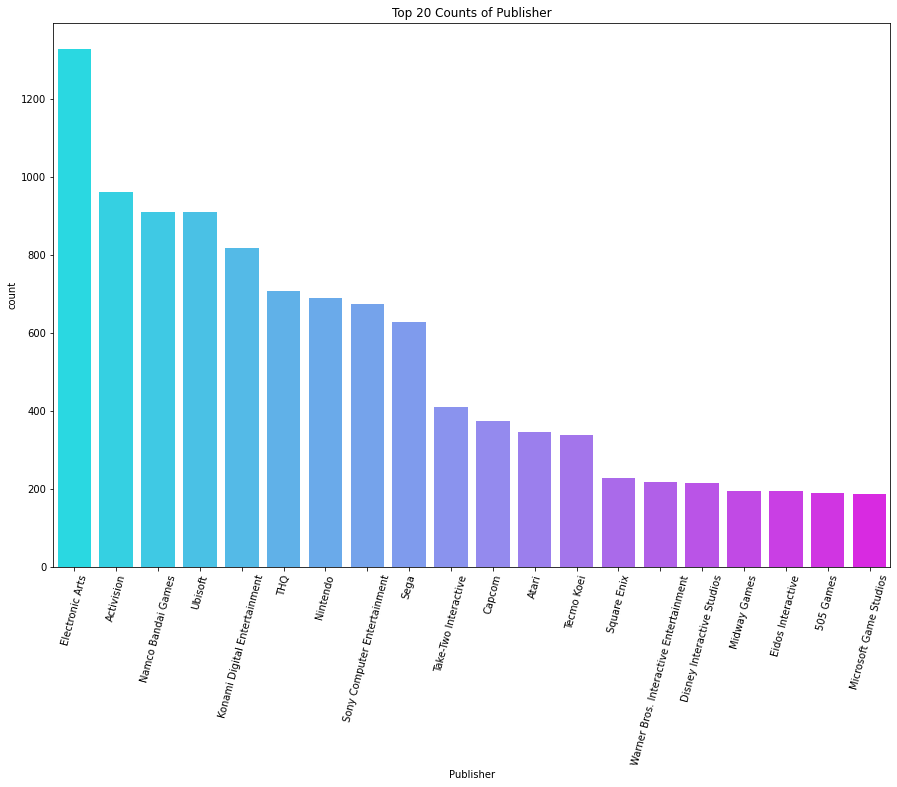

In [ ]:
# 공급사별 게임 발매량(Top 20)
plt.figure(figsize=(15,10))
plt.xticks(rotation = 75)
sns.countplot(x=df['Publisher'], data=df, order=df.groupby(by=['Publisher'])
['Year'].count().sort_values(ascending=False).iloc[:20].index, palette='cool')
plt.title('Top 20 Counts of Publisher')
plt.show()

In [ ]:
# 플랫폼별 매출액
df_Platform = df.groupby(by=['Platform'])['Total_Sales'].sum()
df_Platform = df_Platform.reset_index()
df_Platform = df_Platform.sort_values(by=['Total_Sales'], ascending=False)

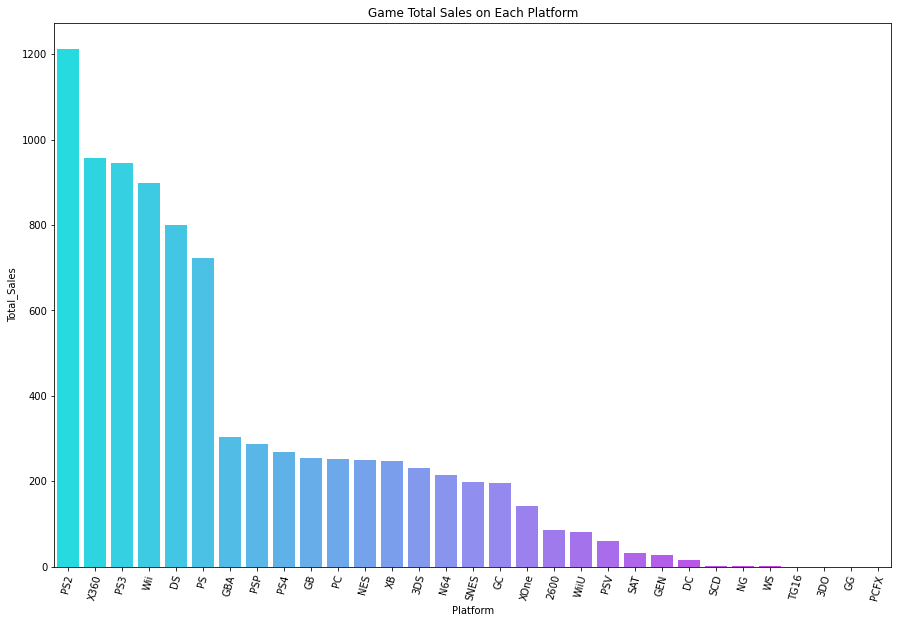

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 75)
sns.barplot(x='Platform', y='Total_Sales', data =df_Platform, palette='cool')
plt.title('Game Total Sales on Each Platform')
plt.show()

In [ ]:
# 연도별 매출액
df_Year = df.groupby(by=['Year'])['Total_Sales'].sum()
df_Year = df_Year.reset_index()

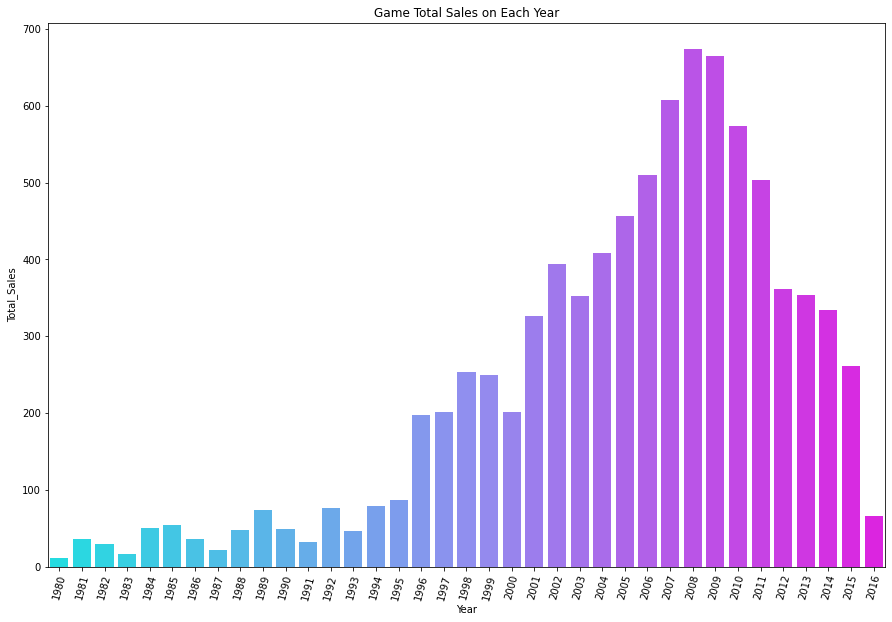

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 75)
sns.barplot(x='Year', y='Total_Sales', data =df_Year, palette='cool')
plt.title('Game Total Sales on Each Year')
plt.show()

In [ ]:
# 장르별 매출액
df_Genre = df.groupby(by=['Genre'])['Total_Sales'].sum()
df_Genre = df_Genre.reset_index()
df_Genre = df_Genre.sort_values(by=['Total_Sales'], ascending=False)

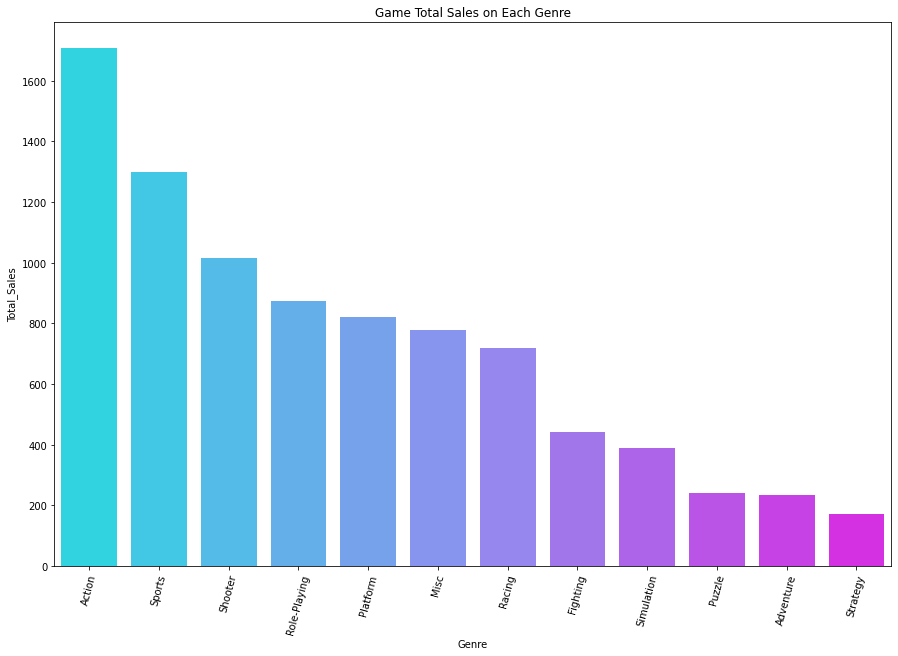

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 75)
sns.barplot(x='Genre', y='Total_Sales', data =df_Genre, palette='cool')
plt.title('Game Total Sales on Each Genre')
plt.show()

In [ ]:
# 공급사별 매출액(Top 20)
df_Publisher = df[['Publisher', 'Total_Sales']]
df_Publisher = df_Publisher.groupby('Publisher')['Total_Sales'].sum().sort_values(ascending=False).head(20)
df_Publisher = pd.DataFrame(df_Publisher).reset_index()

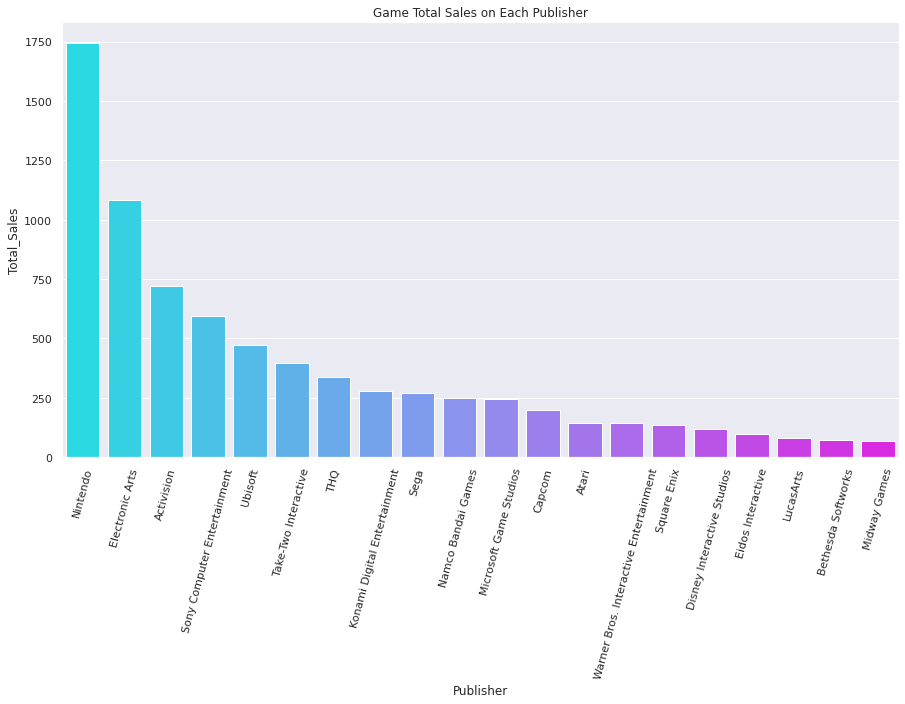

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 75)
sns.barplot(x='Publisher', y='Total_Sales', data =df_Publisher, palette='cool')
plt.title('Game Total Sales on Each Publisher')
plt.show()

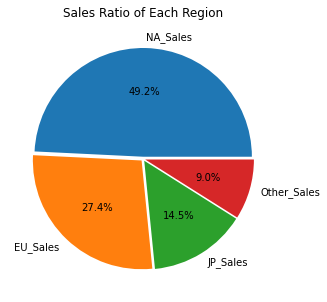

In [ ]:
# 지역별 매출비중
df_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_region = df_region.sum().reset_index()
df_region = df_region.rename(columns={'index': 'Region', 0: 'Sales'})
labels = df_region.Region
sizes = df_region.Sales
explode = [0.02, 0.02, 0.02, 0.02]
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%.1f%%', explode=explode)
plt.title('Sales Ratio of Each Region')
plt.show()

# 3. 사안별 분석

1.   지역에 따른 선호게임 장르
2.   연도별 게임 트렌드
3.   출고량이 높은 게임에 대한 분석 및 시각화

### 1) 지역에 따른 선호게임 장르

*   NA, EU, Other 지역에서 'Action' 선호가 가장 높음
*   단, JP 지역에서는 'Role-Playing' 선호가 가장 높음

In [ ]:
# 지역에 따른 선호게임 장르
com_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
com_map = com_genre.groupby(by=['Genre']).sum()

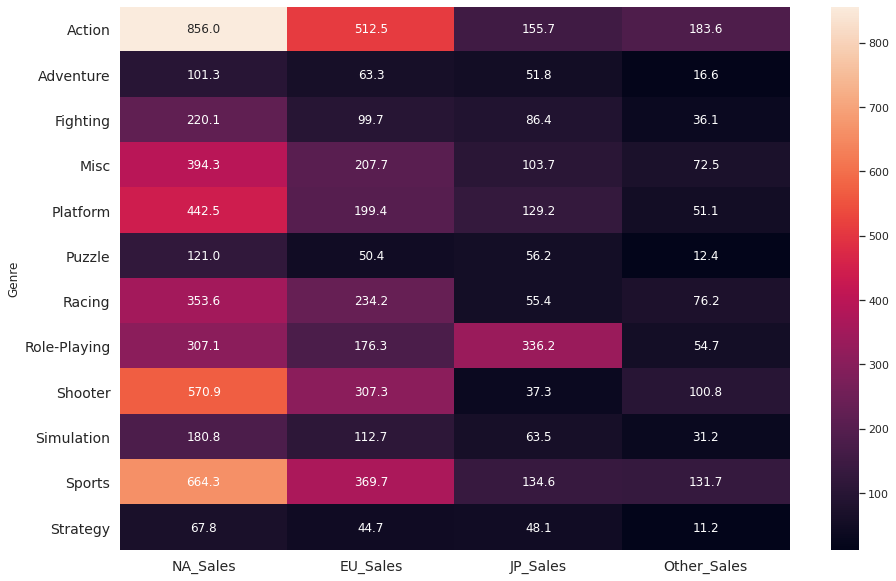

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(com_map, annot=True, fmt='.1f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 2) 연도별 게임 트렌드
*   발매량
  * 'Action' 발매량이 압도적으로 높음
  * 최근 10년 동안 'Action' 발매량이 지속적으로 1위
*   매출액
  * 발매량과 동일하게 'Action' 매출액이 압도적으로 높음
  * 발매량 트렌드와 거의 동일함

In [ ]:
# 1. 연도별 장르 트렌드(발매량)
df_year_max = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
df_year_inx = df_year_max.groupby(['Year'])['count'].transform(max) == df_year_max['count']
df_genre_max = df_year_max[df_year_inx].reset_index(drop=True)
df_genre_max = df_genre_max.drop_duplicates(subset=['Year', 'count'], keep='last').reset_index(drop=True)

In [ ]:
genre = df_genre_max['Genre'].values

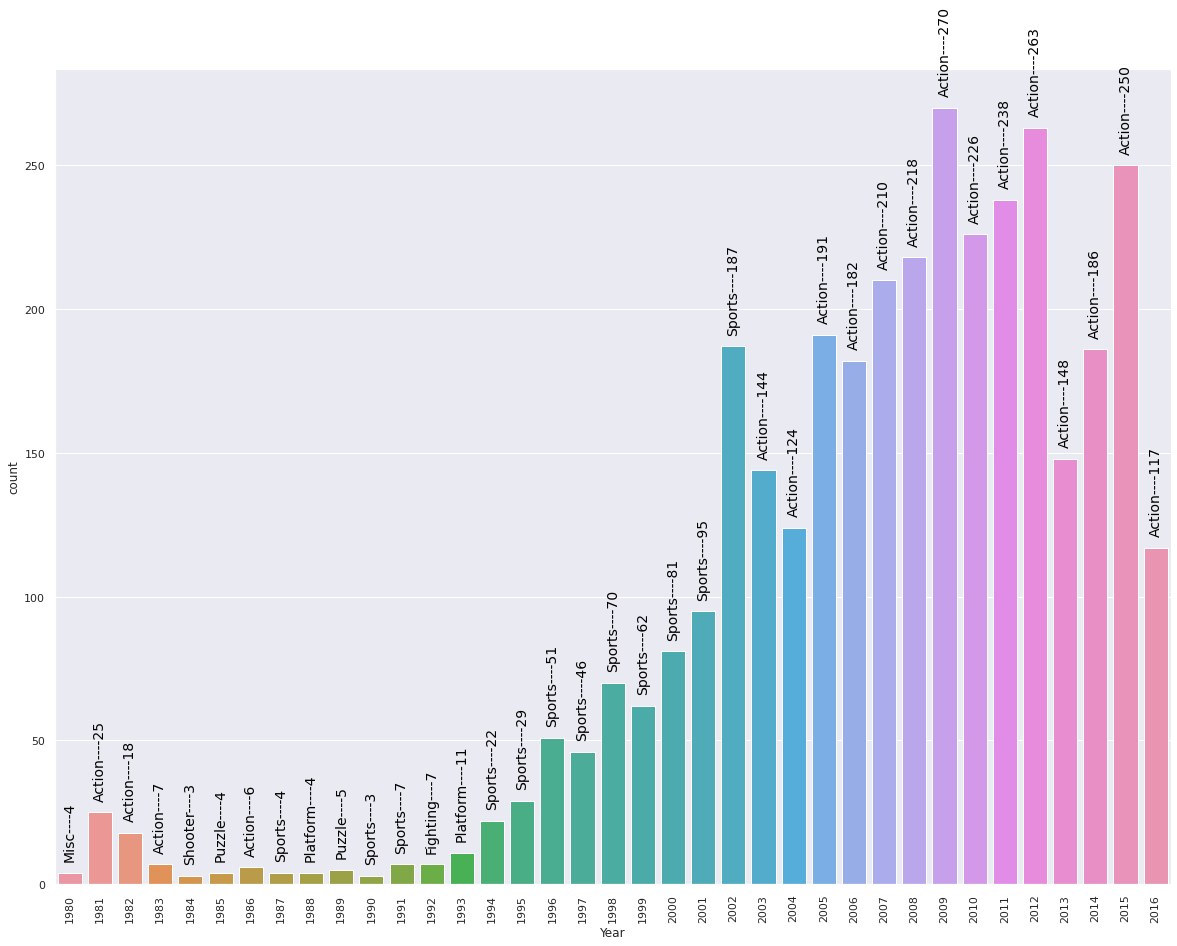

In [ ]:
plt.figure(figsize=(20, 15))
sns_genre = sns.barplot(x = 'Year', y = 'count', data=df_genre_max)
index = 0
for value in df_genre_max['count'].values:
  sns_genre.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000',
                 size=14, rotation= 90, ha='center')
  index += 1

plt.xticks(rotation=90)
plt.show()

In [ ]:
# 2) 연도별 장르 트렌드(가장 높은 매출액을 기록한 게임의 장르)
df_ysales = df.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
df_ysales_g = df_ysales.groupby(by=['Year'])['Total_Sales'].transform(max) == df_ysales['Total_Sales']
df_ysales_max = df_ysales[df_ysales_g].reset_index(drop=True)

In [ ]:
genre_ysales = df_ysales_max['Genre']

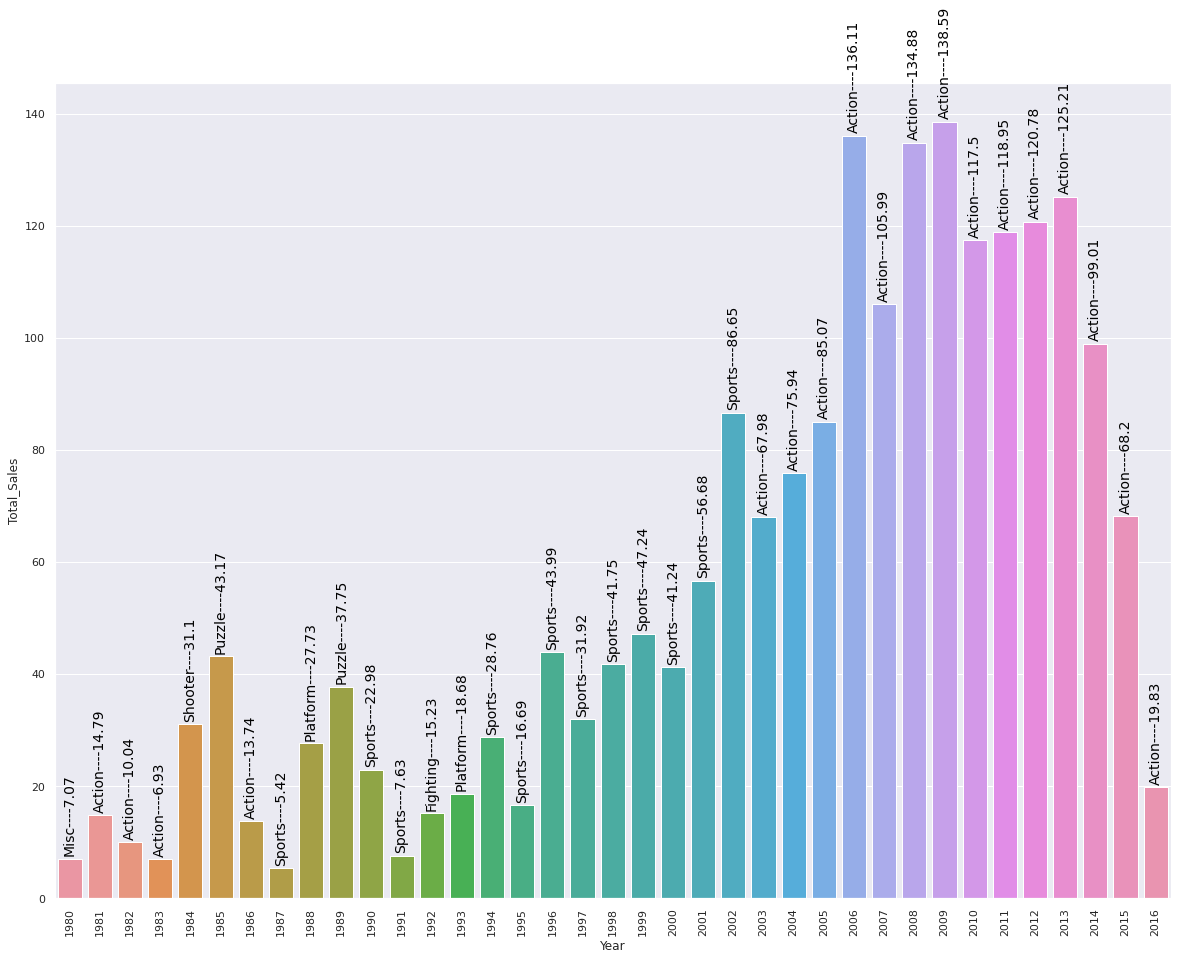

In [ ]:
plt.figure(figsize=(20, 15))
sns_ysales = sns.barplot(x = 'Year', y = 'Total_Sales', data=df_ysales_max)
index = 0
for value in df_ysales_max['Total_Sales']:
  sns_ysales.text(index, value +1, str(genre[index] + '----' +str(round(value, 2))),
                  color = '#000', size=14, rotation=90, ha='center')
  index += 1

plt.xticks(rotation=90)
plt.show()

### 3) 출고량이 높은 게임에 대한 분석 및 시각화


*   전 기간 가장 높은 매출을 기록한 게임 'Wii Sports'(1980 ~ 2016 기준)
*   Top 10 게임 분석 결과
  * Platform 1위 'Wii'
  * Year 1위 '2006'
  * Publisher 1위 'Nintendo'
  * 지역별(NA, EU, Other) 1위 'Wii Sports'
  * 단, JP(일본) 1위 'Pokemon Red/Pokemon Blue'



In [ ]:
# 전체 연도에서 가장 높은 매출을 기록한 게임(Top 10)
df.sort_values(by='Total_Sales', ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Text(0, 0.5, 'Game')

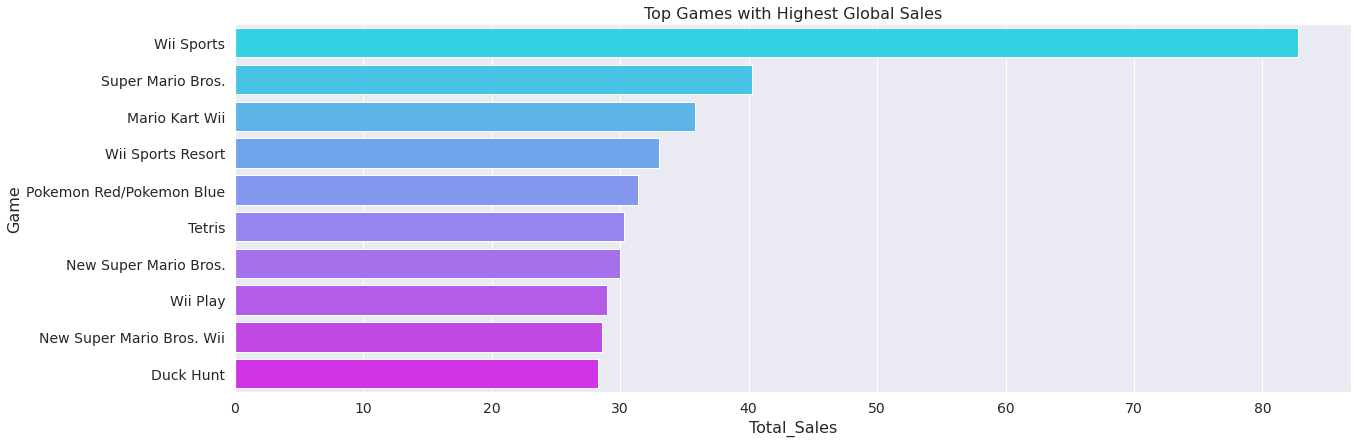

In [ ]:
# Top 10 Game 판매량 시각화
plt.figure(figsize=(20,23))
plt.subplot2grid((3,1), (1,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Games with Highest Global Sales', fontdict={'fontsize': 16})
sns.barplot(y='Name', x='Total_Sales', data=df.sort_values(by='Total_Sales', ascending=False).head(10),
            palette='cool')
plt.xlabel('Total_Sales', fontdict={'fontsize' : 16})
plt.ylabel('Game', fontdict={'fontsize' : 16})

In [ ]:
# Top 10 Games 지역별 판매량
df_top_reg = df.sort_values(by='Total_Sales', ascending=False).reset_index(drop=True).head(10)
df_top_reg = df_top_reg[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_top_reg = df_top_reg.groupby(by=['Name']).sum()

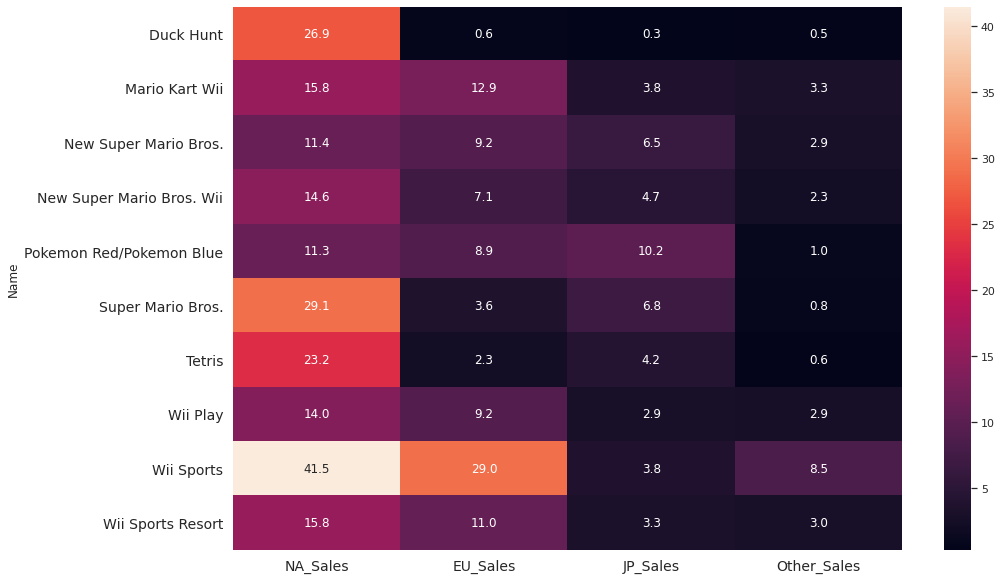

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(df_top_reg, annot=True, fmt='.1f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

*   최근 5년간 데이터 분석



In [ ]:
# 최근 5년간 가장 높은 매출을 기록한 게임
# top10 중복이 존재, 플랫폼별 같은 게임이 순위에 올라와있음
df[df['Year']>=2012].sort_values(by='Total_Sales', ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
3,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
5,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
6,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
7,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21
8,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,3.66,3.07,2.47,0.63,9.83
9,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76


In [ ]:
# 중복을 없애고 최종 Top10 선정
df_game_top = df[df['Year']>=2012].groupby(by='Name')['Total_Sales'].sum().reset_index()
df_game_top = df_game_top.sort_values(by='Total_Sales', ascending=False).head(10)
df_game_top

,Name,Total_Sales
518,Grand Theft Auto V,55.92
159,Call of Duty: Black Ops II,29.73
160,Call of Duty: Ghosts,27.37
158,Call of Duty: Black Ops 3,25.30
821,Minecraft,23.75
157,Call of Duty: Advanced Warfare,21.89
396,FIFA 15,19.02
395,FIFA 14,17.16
397,FIFA 16,16.43
400,FIFA Soccer 13,16.15


Text(0, 0.5, 'Game')

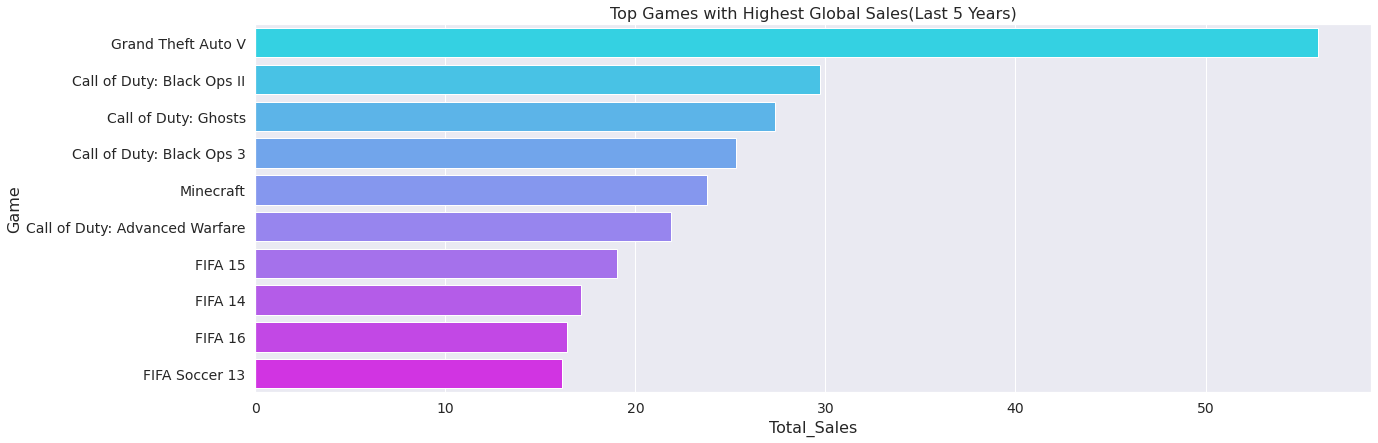

In [ ]:
# 최근 5년간 Top 10 Games 선정
plt.figure(figsize=(20,23))
plt.subplot2grid((3,1), (1,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Games with Highest Global Sales(Last 5 Years)', fontdict={'fontsize': 16})
sns.barplot(y='Name', x='Total_Sales', data=df_game_top, palette='cool')
plt.xlabel('Total_Sales', fontdict={'fontsize' : 16})
plt.ylabel('Game', fontdict={'fontsize' : 16})

In [ ]:
# 최근 5년간 매출액이 높은 게임의 플랫폼 순위
df_top_pl = df[df['Year']>=2012].sort_values(by='Total_Sales', ascending=False).reset_index(drop=True).head(10)
df_top_pl = df_top_pl[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
df_top_pl = df_top_pl.groupby(by=['Platform']).sum()
df_top_pl['NA_Sales'] = df_top_pl['NA_Sales'] / df_top_pl['Total_Sales']
df_top_pl['EU_Sales'] = df_top_pl['EU_Sales'] / df_top_pl['Total_Sales']
df_top_pl['JP_Sales'] = df_top_pl['EU_Sales'] / df_top_pl['Total_Sales']
df_top_pl['Other_Sales'] = df_top_pl['Other_Sales'] / df_top_pl['Total_Sales']
df_top_pl['Total_Sales'] = df_top_pl['Total_Sales'] / df_top_pl['Total_Sales'].sum()

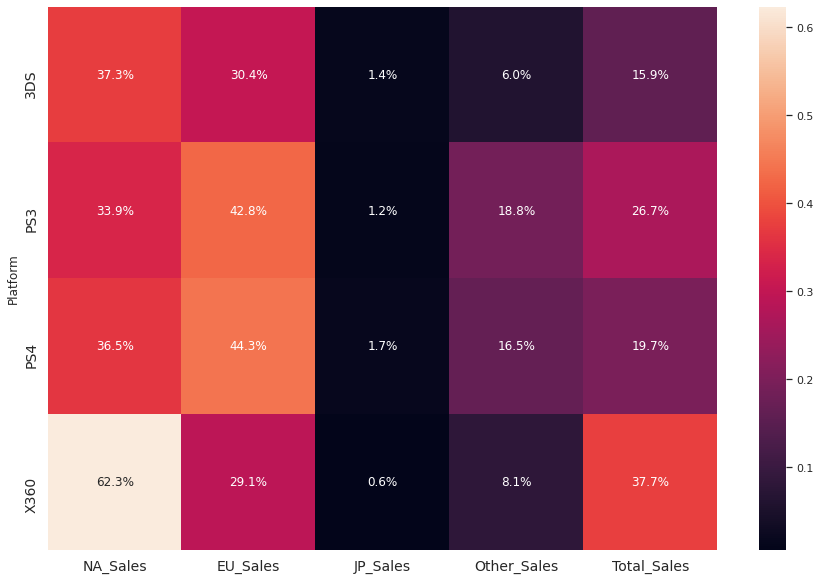

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(df_top_pl, annot=True, fmt='.1%')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
# 최근 5년간 매출액이 높은 게임의 장르 순위
df_top_gen = df[df['Year']>=2012].sort_values(by='Total_Sales', ascending=False).reset_index(drop=True).head(10)
df_top_gen = df_top_gen[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
df_top_gen = df_top_gen.groupby(by=['Genre']).sum()
df_top_gen['NA_Sales'] = df_top_gen['NA_Sales'] / df_top_gen['Total_Sales']
df_top_gen['EU_Sales'] = df_top_gen['EU_Sales'] / df_top_gen['Total_Sales']
df_top_gen['JP_Sales'] = df_top_gen['EU_Sales'] / df_top_gen['Total_Sales']
df_top_gen['Other_Sales'] = df_top_gen['Other_Sales'] / df_top_gen['Total_Sales']
df_top_gen['Total_Sales'] = df_top_gen['Total_Sales'] / df_top_gen['Total_Sales'].sum()

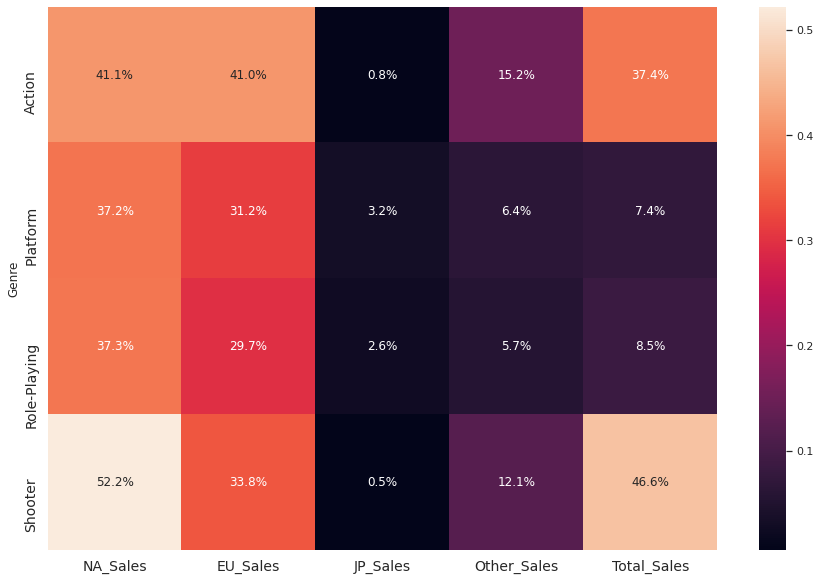

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(df_top_gen, annot=True, fmt='.1%')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
# 최근 5년간 매출액이 높은 게임의 공급사 순위
df_top_pu = df[df['Year']>=2012].sort_values(by='Total_Sales', ascending=False).reset_index(drop=True).head(10)
df_top_pu = df_top_pu[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
df_top_pu = df_top_pu.groupby(by=['Publisher']).sum()
df_top_pu['NA_Sales'] = df_top_pu['NA_Sales'] / df_top_pu['Total_Sales']
df_top_pu['EU_Sales'] = df_top_pu['EU_Sales'] / df_top_pu['Total_Sales']
df_top_pu['JP_Sales'] = df_top_pu['EU_Sales'] / df_top_pu['Total_Sales']
df_top_pu['Other_Sales'] = df_top_pu['Other_Sales'] / df_top_pu['Total_Sales']
df_top_pu['Total_Sales'] = df_top_pu['Total_Sales'] / df_top_pu['Total_Sales'].sum()

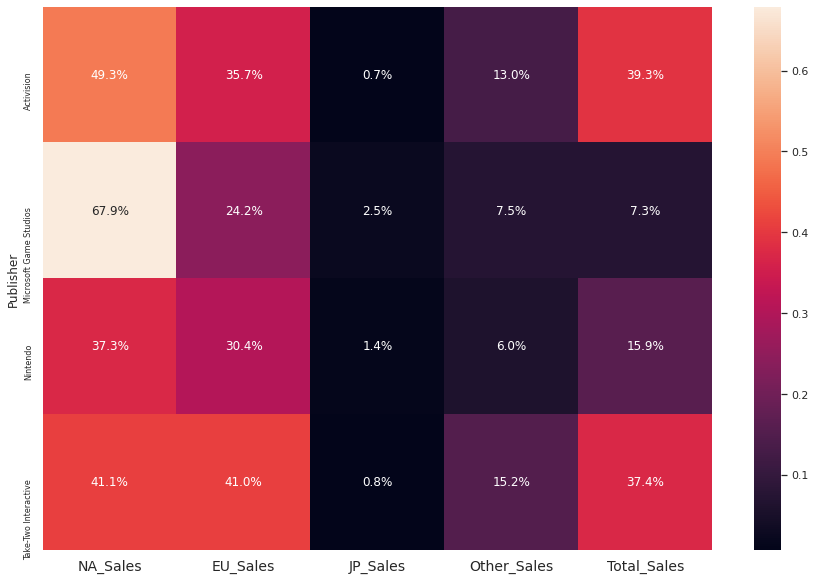

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(df_top_pu, annot=True, fmt='.1%')
plt.xticks(fontsize=14)
plt.yticks(fontsize=8)
plt.show()

## 3. 분석결과
### *최근 5년간 분류별 순위(매출액 기준)
* 장르(Genre)
  * 1위 'Shooter'
  * 2위 'Action'
* 플랫폼(Platform)
  * 1위 'X360'
  * 2위 'PS3'
* 공급사(Publisher)
  * 1위 'Activision'
  * 2위 'TakeTwo Interactive'


In [ ]:
# 최근 5년간 매출액이 높은 장르 1위 'Shooter'와 2위 'Action' 간 매출액에서 유의미한 차이가 있는가?
# T-Test 평균 비교를 사용
# 귀무가설: 1위 'Shooter'와 2위 'Action'간 매출액 차이가 없다.
# 대립가설: 두 장르간 매출액 차이가 있다.
df_gen_mean = df[df['Year']>=2012]
shooter_mean = df_gen_mean[df_gen_mean['Genre'] == 'Shooter']['Total_Sales']
action_mean = df_gen_mean[df_gen_mean['Genre'] == 'Action']['Total_Sales']
p_value_t = stats.ttest_ind(shooter_mean, action_mean, equal_var=False).pvalue

if p_value_t >= 0.05 :
  print('두 장르간 매출액 차이가 없다')
else:
  print('두 장르간 매출액 차이가 있다')

두 장르간 매출액 차이가 있다


In [ ]:
# 최근 5년간 매출액이 높은 플랫폼 1위 'X360'와 2위 'PS3' 간 매출액에서 유의미한 차이가 있는가?
# T-Test 평균 비교를 사용
# 귀무가설: 1위 'X360'와 2위 'PS3'간 매출액 차이가 없다.
# 대립가설: 두 플랫폼간 매출액 차이가 있다.
df_pl_mean = df[df['Year']>=2012]
x360_mean = df_pl_mean[df_pl_mean['Platform'] == 'X360']['Total_Sales']
ps3_mean = df_pl_mean[df_pl_mean['Platform'] == 'PS3']['Total_Sales']
p_value_t = stats.ttest_ind(x360_mean, ps3_mean, equal_var=False).pvalue

if p_value_t >= 0.05 :
  print('두 플랫폼간 매출액 차이가 없다')
else:
  print('두 플랫폼간 매출액 차이가 있다')

두 플랫폼간 매출액 차이가 없다


In [ ]:
# 최근 5년간 매출액이 높은 공급사 1위 'Activision'와 2위 'TakeTwo Interactive' 간 매출액에서 유의미한 차이가 있는가?
# T-Test 평균 비교를 사용
# 귀무가설: 1위 'Activision'와 2위 'TakeTwo Interactive'간 매출액 차이가 없다.
# 대립가설: 두 공급사간 매출액 차이가 있다.
df_pu_mean = df[df['Year']>=2012]
act_mean = df_pu_mean[df_pu_mean['Publisher'] == 'Activision']['Total_Sales']
take_mean = df_pu_mean[df_pu_mean['Publisher'] == 'TakeTwo Interactive']['Total_Sales']
p_value_t = stats.ttest_ind(act_mean, take_mean, equal_var=False).pvalue

if p_value_t >= 0.05 :
  print('두 공급사간 매출액 차이가 없다')
else:
  print('두 공급사간 매출액 차이가 있다')

두 공급사간 매출액 차이가 있다


장르는 'Shooter', 공급사는 'Activision'

플랫폼은
 1. X360
 2. PS3
중 무엇을 선택할 것인가?


In [ ]:
# 1. Activision, Shooter장르의 매출은 높은가?

df_ac_gen = df[df['Year']>=2012]
df_ac_gen = df_ac_gen[df_ac_gen['Publisher'] == 'Activision'].groupby(by='Genre')['Total_Sales'].sum().reset_index()

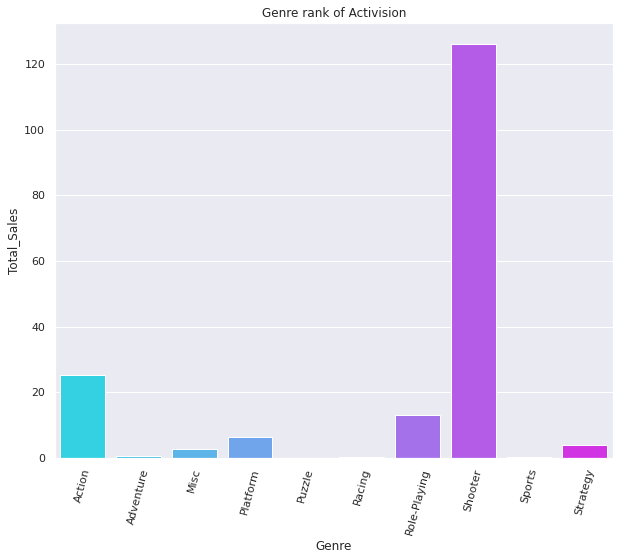

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 75)
sns.barplot(x='Genre', y='Total_Sales', data =df_ac_gen, palette='cool')
plt.title('Genre rank of Activision')
plt.show()

In [ ]:
# 2. Activision의 X360 슈터 매출은 어떠한가?
df_ac_x360 = df[df['Year']>=2012]
df_ac_x360 = df_ac_x360[df_ac_x360['Publisher'] == 'Activision']
df_ac_x360 = df_ac_x360[df_ac_x360['Platform'] == 'X360'].groupby(by='Genre')['Total_Sales'].sum().reset_index()

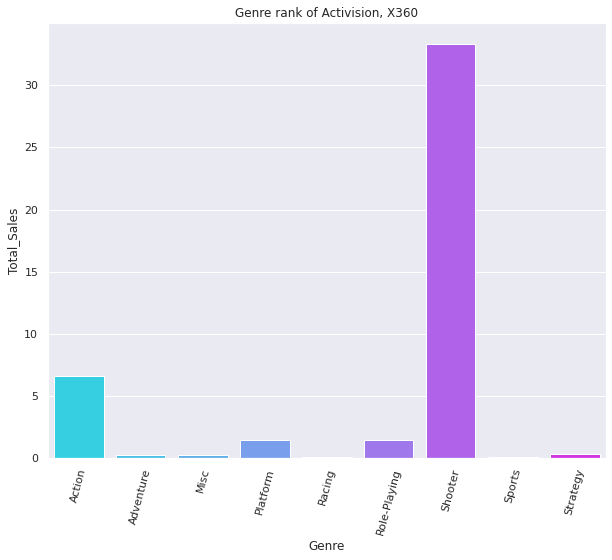

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 75)
sns.barplot(x='Genre', y='Total_Sales', data =df_ac_x360, palette='cool')
plt.title('Genre rank of Activision, X360')
plt.show()

In [ ]:
# 3. Activision의 PS3 Shooter 매출은 어떠한가?

df_ac_ps3 = df[df['Year']>=2012]
df_ac_ps3 = df_ac_ps3[df_ac_ps3['Publisher'] == 'Activision']
df_ac_ps3 = df_ac_ps3[df_ac_ps3['Platform'] == 'PS3'].groupby(by='Genre')['Total_Sales'].sum().reset_index()

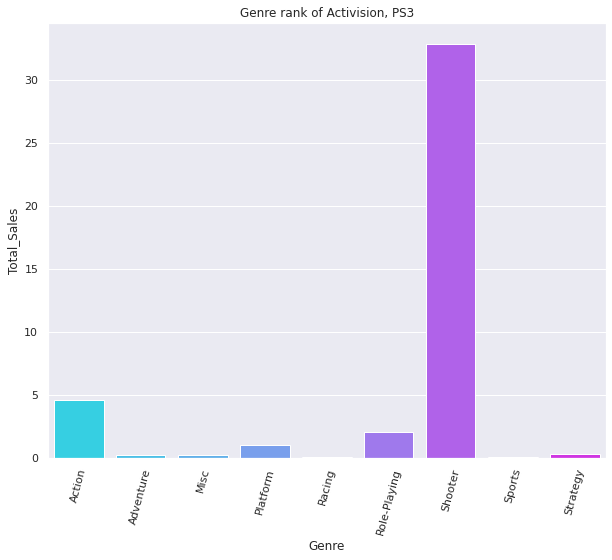

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 75)
sns.barplot(x='Genre', y='Total_Sales', data =df_ac_ps3, palette='cool')
plt.title('Genre rank of Activision, PS3')
plt.show()

In [ ]:
# 두 플랫폼 모두 슈터가 가장 높은 매출비중을 차지하고 있다.(공급사 Activision)
# 그러면 두 플랫폼(X360, PS3)의 슈터 매출액에 유의미한 차이가 있을까?

df_x360_t = df[df['Year']>=2012]
df_x360_t = df_x360_t[df_x360_t['Publisher'] == 'Activision']
df_x360_t = df_x360_t[df_x360_t['Platform'] == 'X360']
df_x360_t = df_x360_t[df_x360_t['Genre'] == 'Shooter']['Total_Sales']

df_ps3_t = df[df['Year']>=2012]
df_ps3_t = df_ps3_t[df_ps3_t['Publisher'] == 'Activision']
df_ps3_t = df_ps3_t[df_ps3_t['Platform'] == 'PS3']
df_ps3_t = df_ps3_t[df_ps3_t['Genre'] == 'Shooter']['Total_Sales']

p_value_t = stats.ttest_ind(df_x360_t, df_ps3_t, equal_var=False).pvalue

if p_value_t >= 0.05 :
  print('두 플랫폼간 매출액 차이가 없다')
else:
  print('두 플랫폼간 매출액 차이가 있다')

두 플랫폼간 매출액 차이가 없다


In [ ]:
# 매출액 차이가 유의미하지 않다면 두 플랫폼 중 어떤 기준으로 선택을 해야하는가?
# 전세계 장르별 매출에서 가장 높은 비중을 차지하는 Shooter의 매출의 대부분은 NA 지역이다.
# NA 지역으로 한정한다면 두 플랫폼 중 경쟁력 높은 플랫폼은 무엇일까?

df_x360_na = df[df['Year']>=2012]
df_x360_na = df_x360_na[df_x360_na['Publisher'] == 'Activision']
df_x360_na = df_x360_na[df_x360_na['Platform'] == 'X360']
df_x360_na = df_x360_na[df_x360_na['Genre'] == 'Shooter']['NA_Sales']

df_ps3_na = df[df['Year']>=2012]
df_ps3_na = df_ps3_na[df_ps3_na['Publisher'] == 'Activision']
df_ps3_na = df_ps3_na[df_ps3_na['Platform'] == 'PS3']
df_ps3_na = df_ps3_na[df_ps3_na['Genre'] == 'Shooter']['NA_Sales']

p_value_t = stats.ttest_ind(df_x360_na, df_ps3_na, equal_var=False).pvalue

if p_value_t >= 0.05 :
  print('두 플랫폼간 매출액 차이가 없다')
else:
  print('두 플랫폼간 매출액 차이가 있다')

두 플랫폼간 매출액 차이가 없다


In [ ]:
# 두 플램폼의 NA 지역 매출액 차이가 유의미하지 않다면
# 두 플랫폼 중 출고량 대비 평균 매출액이 높은 곳은 무엇일까?(T-test 결과와 동일)

df_x360_mean = df[df['Year']>=2012]
df_x360_mean = df_x360_mean[df_x360_mean['Publisher'] == 'Activision']
df_x360_mean = df_x360_mean[df_x360_mean['Platform'] == 'X360']
df_x360_mean = df_x360_mean[df_x360_mean['Genre'] == 'Shooter']
round(df_x360_mean['NA_Sales'].sum() / df_x360_mean['Name'].count(), 3)

1.91

In [ ]:
df_ps3_mean = df[df['Year']>=2012]
df_ps3_mean = df_ps3_mean[df_ps3_mean['Publisher'] == 'Activision']
df_ps3_mean = df_ps3_mean[df_ps3_mean['Platform'] == 'PS3']
df_ps3_mean = df_ps3_mean[df_ps3_mean['Genre'] == 'Shooter']
round(df_ps3_mean['NA_Sales'].sum() / df_ps3_mean['Name'].count(), 3)

1.236

플랫폼 간 큰 차이가 없는 것으로 보여
이 경우 시장의 규모가 크고, 평균 매출액이 약간 높은 X360 플랫폼으로
출시하는 것이 좋을 것으로 판단된다.

# 최종 선정 게임
1. 플랫폼: X360
2. 장르: Shooter
3. 공급사: Activision
4. 출시지역: 전세계 대상